In [80]:
import pandas as pd
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve

In [81]:
df = pd.read_csv('/content/covid(For Naive Bayes Program) (1).csv')
df.head()

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False


In [82]:
encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype == 'bool' :
        df[column] = encoder.fit_transform(df[column])
df.head()

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,1,1,1,0,1,1,1
1,2,1,1,2,0,1,0,1
2,3,1,0,2,0,1,1,0
3,4,1,0,2,0,0,1,1
4,5,1,2,0,0,1,1,0


In [83]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [85]:
classifier = CategoricalNB()
# classifier = GaussianNB()
# dono mei se koi ek jo teacher bole
classifier.fit(X_train, y_train)


CategoricalNB()

In [86]:
y_pred = classifier.predict(X_test)


In [87]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.80
Recall: 0.75
Precision: 1.00
F1 Score: 0.86


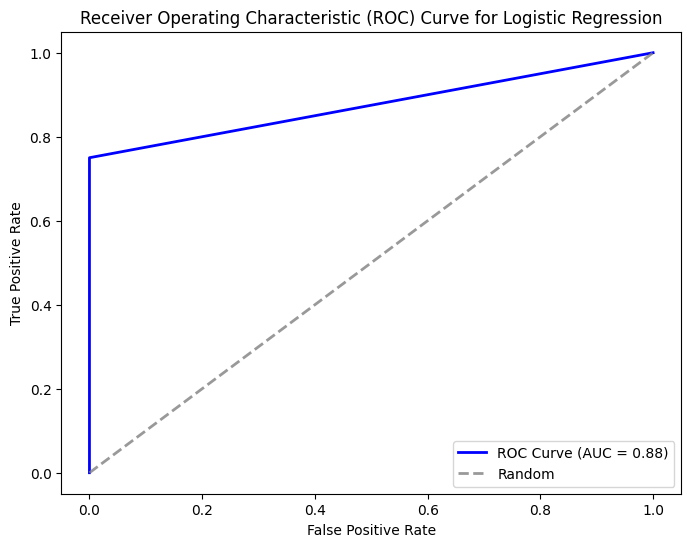

In [88]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2, label='Random', alpha=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 106, in predict
    jll = self._joint_log_likelihood(X)
  File "/usr/local/lib/python3.10/dist-pack

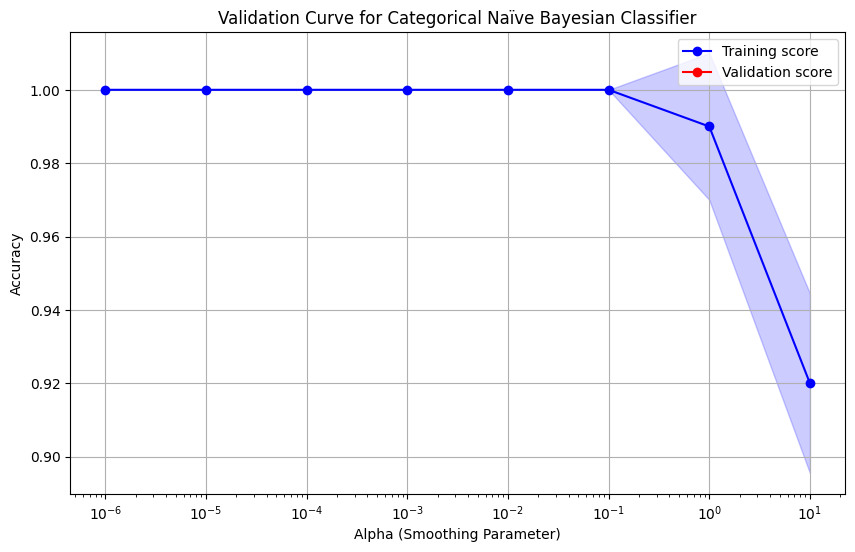

In [92]:
param_range = np.logspace(-6, 1, 8)

# Calculate validation curve
train_scores, test_scores = validation_curve(
    model, X, y, param_name='alpha', param_range=param_range, cv=5, scoring='accuracy'
)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.semilogx(param_range, np.mean(train_scores, axis=1), label='Training score', color='blue', marker='o')
plt.semilogx(param_range, np.mean(test_scores, axis=1), label='Validation score', color='red', marker='o')
plt.fill_between(param_range, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                 np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), alpha=0.2, color='blue')
plt.fill_between(param_range, np.mean(test_scores, axis=1) - np.std(test_scores, axis=1),
                 np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), alpha=0.2, color='red')
plt.title('Validation Curve for Categorical Naïve Bayesian Classifier')
plt.xlabel('Alpha (Smoothing Parameter)')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()